In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os.path

from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose, Normalize

from tqdm import tqdm

import sys
sys.path.append('../')

from noise import AddLabelNoise

In [2]:
# Load dataset
n_classes = 10

#eta   = 0.0
sigma = 0.0

eta_all = [0.0, 0.2, 0.4, 0.6, 0.8]

g = torch.Generator()
g.manual_seed(2147483647)

for eta in eta_all:

    # Download training data from open datasets.
    train_data = datasets.MNIST(
        root = "raw-data",
        train = True,
        download = True,
        transform = ToTensor(),
        target_transform = AddLabelNoise(eta,n_classes)
    )

    # Download test data from open datasets.
    test_data = datasets.MNIST(
        root = "raw-data",
        train = False,
        download = True,
        transform = ToTensor(),
    )

    print("Training dataset size:")
    print(len(train_data))

    print("Test dataset size:")
    print(len(test_data))
    
    # Create folder
    if not os.path.exists('data-sub/'):
        os.mkdir('data-sub/')

    torch.save(train_data, 'data-sub/train_data-sigma{}_eta{}'.format(sigma,eta))
    torch.save(test_data, 'data-sub/test_data-sigma{}_eta{}'.format(sigma,eta))

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


AttributeError: 'FloatProgress' object has no attribute 'style'

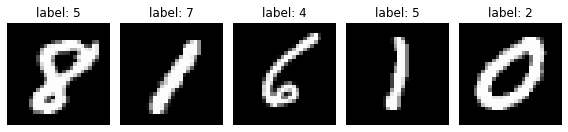

In [5]:
# Visualise dataset

figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 1
for i in range(1, cols*rows+1):
    
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    
    plt.title("label: {}".format(label))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    plt.tight_layout()    

plt.show()

In [4]:
# Create data loaders
batch_size_train = 64
batch_size_test  = 64

train_dataloader = DataLoader(train_data, batch_size=batch_size_train, shuffle=True)
test_dataloader  = DataLoader(test_data,     batch_size=batch_size_test,  shuffle=True)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64
